# **Pre-processing Data using Pandas**

## Import Libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

from google.colab import drive
drive.mount('/content/drive')

import requests
import numpy as np
import pandas as pd
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)


from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows

sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Dataset

In [ ]:
PATH = '/content/drive/MyDrive/PREDICT/Dataset/'

### Data tháng 1/2023

In [ ]:
df1 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M1.csv')
df1.head()
df1.shape




,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4630,DLH,63,MSP,63,510,516.0,6.0,0.0,0.0,76.0,94.0,33.0,1.0,144.0
1,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4633,ORF,38,DTW,43,530,536.0,6.0,0.0,0.0,125.0,112.0,91.0,1.0,529.0
2,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4639,ATL,34,ILM,36,900,856.0,-4.0,0.0,0.0,83.0,87.0,57.0,1.0,377.0
3,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4639,ILM,36,ATL,34,1103,1101.0,-2.0,0.0,0.0,101.0,101.0,66.0,1.0,377.0
4,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4640,CID,61,MSP,63,630,620.0,-10.0,0.0,0.0,93.0,90.0,45.0,1.0,220.0


(538837, 22)

### Data tháng 2/2023

In [ ]:
df2 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M2.csv')
df2.head()
df2.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,1,2,1,3,2/1/2023 12:00:00 AM,9E,4629,LGA,22,BGM,22,2129,2156.0,27.0,0.0,0.0,59.0,53.0,30.0,1.0,147.0
1,2023,1,2,1,3,2/1/2023 12:00:00 AM,9E,4631,ATL,34,FAY,36,1354,1350.0,-4.0,0.0,0.0,76.0,63.0,46.0,1.0,331.0
2,2023,1,2,1,3,2/1/2023 12:00:00 AM,9E,4631,FAY,36,ATL,34,1600,1556.0,-4.0,0.0,0.0,96.0,91.0,64.0,1.0,331.0
3,2023,1,2,1,3,2/1/2023 12:00:00 AM,9E,4632,JFK,22,ITH,22,2200,2155.0,-5.0,0.0,0.0,69.0,77.0,43.0,1.0,189.0
4,2023,1,2,1,3,2/1/2023 12:00:00 AM,9E,4635,BWI,35,JFK,22,1702,1802.0,60.0,0.0,0.0,103.0,106.0,49.0,1.0,184.0


(502749, 22)

### Data tháng 3/2023

In [ ]:
df3 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M3.csv')
df3.head()
df3.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,1,3,1,3,3/1/2023 12:00:00 AM,9E,4629,LGA,22,BGM,22,2105,2101.0,-4.0,0.0,0.0,66.0,70.0,38.0,1.0,147.0
1,2023,1,3,1,3,3/1/2023 12:00:00 AM,9E,4630,DTW,43,GRB,45,1000,955.0,-5.0,0.0,0.0,108.0,65.0,52.0,1.0,287.0
2,2023,1,3,1,3,3/1/2023 12:00:00 AM,9E,4630,GRB,45,DTW,43,1133,1128.0,-5.0,0.0,0.0,79.0,66.0,43.0,1.0,287.0
3,2023,1,3,1,3,3/1/2023 12:00:00 AM,9E,4631,ATL,34,FAY,36,1355,1350.0,-5.0,0.0,0.0,79.0,66.0,46.0,1.0,331.0
4,2023,1,3,1,3,3/1/2023 12:00:00 AM,9E,4631,FAY,36,ATL,34,1600,1555.0,-5.0,0.0,0.0,99.0,77.0,61.0,1.0,331.0


(580322, 22)

### Data tháng 4/2023

In [ ]:
df4 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M4.csv')
df4.head()
df4.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,2,4,1,6,4/1/2023 12:00:00 AM,9E,4628,JFK,22,BUF,22,1730,1816.0,46.0,0.0,0.0,98.0,99.0,61.0,1.0,301.0
1,2023,2,4,1,6,4/1/2023 12:00:00 AM,9E,4629,ITH,22,JFK,22,1443,1455.0,12.0,0.0,0.0,86.0,74.0,50.0,1.0,189.0
2,2023,2,4,1,6,4/1/2023 12:00:00 AM,9E,4629,JFK,22,ITH,22,1250,1309.0,19.0,0.0,0.0,68.0,77.0,40.0,1.0,189.0
3,2023,2,4,1,6,4/1/2023 12:00:00 AM,9E,4630,CLE,44,JFK,22,1700,1655.0,-5.0,0.0,0.0,97.0,93.0,75.0,1.0,425.0
4,2023,2,4,1,6,4/1/2023 12:00:00 AM,9E,4631,ATL,34,FAY,36,1353,1412.0,19.0,0.0,0.0,82.0,68.0,51.0,1.0,331.0


(561441, 22)

### Data tháng 5/2023

In [ ]:
df5 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M5.csv')
df5.head()
df5.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,2,5,1,1,5/1/2023 12:00:00 AM,9E,4628,ROC,22,LGA,22,1000,955.0,-5.0,0.0,0.0,82.0,93.0,48.0,1.0,254.0
1,2023,2,5,1,1,5/1/2023 12:00:00 AM,9E,4629,ITH,22,JFK,22,1520,1605.0,45.0,0.0,0.0,69.0,67.0,45.0,1.0,189.0
2,2023,2,5,1,1,5/1/2023 12:00:00 AM,9E,4630,CLE,44,JFK,22,1644,1642.0,-2.0,0.0,0.0,105.0,89.0,71.0,1.0,425.0
3,2023,2,5,1,1,5/1/2023 12:00:00 AM,9E,4631,IAD,38,LGA,22,1805,1849.0,44.0,0.0,0.0,84.0,69.0,48.0,1.0,229.0
4,2023,2,5,1,1,5/1/2023 12:00:00 AM,9E,4632,JFK,22,CLE,44,1458,1453.0,-5.0,0.0,0.0,126.0,118.0,80.0,1.0,425.0


(579958, 22)

### Data tháng 6/2023

In [ ]:
df6 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M6.csv')
df6.head()
df6.shape



,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,4628,ROC,22,LGA,22,1001,956.0,-5.0,0.0,0.0,78.0,80.0,49.0,1.0,254.0
1,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,4629,ITH,22,JFK,22,1452,1447.0,-5.0,0.0,0.0,67.0,69.0,46.0,1.0,189.0
2,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,4629,JFK,22,ITH,22,1255,1243.0,-12.0,0.0,0.0,69.0,67.0,36.0,1.0,189.0
3,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,4630,CHA,54,DTW,43,1249,1248.0,-1.0,0.0,0.0,119.0,113.0,89.0,1.0,505.0
4,2023,2,6,1,4,6/1/2023 12:00:00 AM,9E,4631,ATL,34,FAY,36,1358,1357.0,-1.0,0.0,0.0,82.0,66.0,52.0,1.0,331.0


(577262, 22)

### Data tháng 7/2023

In [ ]:
df7 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M7.csv')
df7.head()
df7.shape



,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,3,7,1,6,7/1/2023 12:00:00 AM,9E,4902,SYR,22,DTW,43,610,607.0,-3.0,0.0,0.0,89.0,85.0,58.0,1.0,374.0
1,2023,3,7,1,6,7/1/2023 12:00:00 AM,9E,4903,BHM,51,LGA,22,1125,1134.0,9.0,0.0,0.0,153.0,142.0,119.0,1.0,866.0
2,2023,3,7,1,6,7/1/2023 12:00:00 AM,9E,4905,LGA,22,CLT,36,1745,1739.0,-6.0,0.0,0.0,136.0,135.0,89.0,1.0,544.0
3,2023,3,7,1,6,7/1/2023 12:00:00 AM,9E,4906,ATL,34,MLU,72,1010,1009.0,-1.0,0.0,0.0,98.0,80.0,63.0,1.0,448.0
4,2023,3,7,1,6,7/1/2023 12:00:00 AM,9E,4906,MLU,72,ATL,34,1133,1130.0,-3.0,0.0,0.0,106.0,80.0,65.0,1.0,448.0


(601866, 22)

### Data tháng 8/2023

In [ ]:
df8 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M8.csv')
df8.head()
df8.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,3,8,1,2,8/1/2023 12:00:00 AM,9E,4900,RIC,38,MSP,63,619,615.0,-4.0,0.0,0.0,181.0,178.0,147.0,1.0,970.0
1,2023,3,8,1,2,8/1/2023 12:00:00 AM,9E,4901,CLT,36,JFK,22,1955,1951.0,-4.0,0.0,0.0,135.0,128.0,89.0,1.0,541.0
2,2023,3,8,1,2,8/1/2023 12:00:00 AM,9E,4901,JFK,22,CLT,36,1629,1622.0,-7.0,0.0,0.0,159.0,115.0,80.0,1.0,541.0
3,2023,3,8,1,2,8/1/2023 12:00:00 AM,9E,4902,SYR,22,DTW,43,615,604.0,-11.0,0.0,0.0,92.0,89.0,64.0,1.0,374.0
4,2023,3,8,1,2,8/1/2023 12:00:00 AM,9E,4903,BHM,51,LGA,22,1108,1103.0,-5.0,0.0,0.0,153.0,136.0,113.0,1.0,866.0


(602987, 22)

### Data tháng 9/2023

In [ ]:
df9 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M9.csv')
df9.head()
df9.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,3,9,1,5,9/1/2023 12:00:00 AM,9E,4900,RIC,38,MSP,63,619,617.0,-2.0,0.0,0.0,180.0,176.0,140.0,1.0,970.0
1,2023,3,9,1,5,9/1/2023 12:00:00 AM,9E,4901,CLT,36,JFK,22,1955,1948.0,-7.0,0.0,0.0,135.0,109.0,78.0,1.0,541.0
2,2023,3,9,1,5,9/1/2023 12:00:00 AM,9E,4901,JFK,22,CLT,36,1629,1619.0,-10.0,0.0,0.0,158.0,123.0,81.0,1.0,541.0
3,2023,3,9,1,5,9/1/2023 12:00:00 AM,9E,4902,SYR,22,DTW,43,615,610.0,-5.0,0.0,0.0,91.0,81.0,60.0,1.0,374.0
4,2023,3,9,1,5,9/1/2023 12:00:00 AM,9E,4903,BHM,51,LGA,22,1109,1104.0,-5.0,0.0,0.0,152.0,144.0,121.0,1.0,866.0


(569338, 22)

### Data tháng 10/2023

In [ ]:
df10 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M10.csv')
df10.head()
df10.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,4,10,1,7,10/1/2023 12:00:00 AM,9E,4800,CVG,52,JFK,22,1755,1748.0,-7.0,0.0,0.0,135.0,154.0,99.0,1.0,589.0
1,2023,4,10,1,7,10/1/2023 12:00:00 AM,9E,4801,CVG,52,MSP,63,1000,955.0,-5.0,0.0,0.0,127.0,105.0,87.0,1.0,596.0
2,2023,4,10,1,7,10/1/2023 12:00:00 AM,9E,4802,CVG,52,DTW,43,1024,1021.0,-3.0,0.0,0.0,75.0,64.0,45.0,1.0,229.0
3,2023,4,10,1,7,10/1/2023 12:00:00 AM,9E,4803,CVG,52,DTW,43,1342,1343.0,1.0,0.0,0.0,78.0,75.0,44.0,1.0,229.0
4,2023,4,10,1,7,10/1/2023 12:00:00 AM,9E,4804,ROC,22,DTW,43,1240,1233.0,-7.0,0.0,0.0,80.0,72.0,47.0,1.0,296.0


(598968, 22)

### Data tháng 11/2023

In [ ]:
df11 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M11.csv')
df11.head()
df11.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,4,11,1,3,11/1/2023 12:00:00 AM,9E,4800,DSM,61,LGA,22,1406,1403.0,-3.0,0.0,0.0,162.0,144.0,124.0,1.0,1031.0
1,2023,4,11,1,3,11/1/2023 12:00:00 AM,9E,4801,CLT,36,LGA,22,1739,1740.0,1.0,0.0,0.0,126.0,156.0,78.0,1.0,544.0
2,2023,4,11,1,3,11/1/2023 12:00:00 AM,9E,4806,OMA,65,LGA,22,1200,1155.0,-5.0,0.0,0.0,167.0,158.0,143.0,1.0,1148.0
3,2023,4,11,1,3,11/1/2023 12:00:00 AM,9E,4814,CVG,52,DCA,38,1420,1446.0,26.0,0.0,0.0,100.0,92.0,72.0,1.0,411.0
4,2023,4,11,1,3,11/1/2023 12:00:00 AM,9E,4823,CHO,38,LGA,22,747,742.0,-5.0,0.0,0.0,94.0,76.0,51.0,1.0,305.0


(563777, 22)

### Data tháng 12/2023

In [ ]:
df12 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2023_M12.csv')
df12.head()
df12.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,4,12,1,5,12/1/2023 12:00:00 AM,9E,4800,LGA,22,STL,64,1846,1836.0,-10.0,0.0,0.0,180.0,175.0,144.0,1.0,888.0
1,2023,4,12,1,5,12/1/2023 12:00:00 AM,9E,4803,LGA,22,SYR,22,2152,2137.0,-15.0,0.0,0.0,71.0,71.0,40.0,1.0,198.0
2,2023,4,12,1,5,12/1/2023 12:00:00 AM,9E,4804,TYS,54,LGA,22,619,612.0,-7.0,0.0,0.0,130.0,108.0,84.0,1.0,647.0
3,2023,4,12,1,5,12/1/2023 12:00:00 AM,9E,4805,LGA,22,TYS,54,1800,1753.0,-7.0,0.0,0.0,148.0,132.0,106.0,1.0,647.0
4,2023,4,12,1,5,12/1/2023 12:00:00 AM,9E,4807,JFK,22,ORF,38,1940,1940.0,0.0,0.0,0.0,101.0,89.0,54.0,1.0,290.0


(570394, 22)

### Data tháng 1/2024

In [ ]:
df13 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M1.csv')
df13.head()
df13.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4814,JFK,22,DTW,43,1252,1247.0,-5.0,0.0,0.0,136.0,122.0,84.0,1.0,509.0
1,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4815,MSP,63,CLE,44,1015,1001.0,-14.0,0.0,0.0,130.0,114.0,88.0,1.0,622.0
2,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4817,JFK,22,RIC,38,1415,1411.0,-4.0,0.0,0.0,106.0,90.0,61.0,1.0,288.0
3,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4817,RIC,38,JFK,22,1650,1643.0,-7.0,0.0,0.0,111.0,76.0,51.0,1.0,288.0
4,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4818,DTW,43,MKE,45,1015,1010.0,-5.0,0.0,0.0,79.0,70.0,45.0,1.0,237.0


(547271, 22)

### Data tháng 2/2024

In [ ]:
df14 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M2.csv')
df14.head()
df14.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,4801,LGA,22,OMA,65,856,852.0,-4.0,0.0,0.0,219.0,205.0,171.0,1.0,1148.0
1,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,4801,OMA,65,LGA,22,1215,1207.0,-8.0,0.0,0.0,164.0,152.0,132.0,1.0,1148.0
2,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,4802,LGA,22,MCI,64,715,705.0,-10.0,0.0,0.0,216.0,194.0,161.0,1.0,1107.0
3,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,4802,MCI,64,LGA,22,1031,1026.0,-5.0,0.0,0.0,163.0,164.0,138.0,1.0,1107.0
4,2024,1,2,1,4,2/1/2024 12:00:00 AM,9E,4803,LGA,22,OMA,65,1329,1321.0,-8.0,0.0,0.0,213.0,191.0,170.0,1.0,1148.0


(519221, 22)

### Data tháng 3/2024

In [ ]:
df15 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M3.csv')
df15.head()
df15.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,4800,AVL,36,LGA,22,1200,1153.0,-7.0,0.0,0.0,112.0,106.0,85.0,1.0,599.0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,4800,LGA,22,AVL,36,900,905.0,5.0,0.0,0.0,136.0,120.0,92.0,1.0,599.0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,4801,LGA,22,OMA,65,850,842.0,-8.0,0.0,0.0,221.0,198.0,175.0,1.0,1148.0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,4801,OMA,65,LGA,22,1211,1201.0,-10.0,0.0,0.0,166.0,165.0,141.0,1.0,1148.0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,4802,LGA,22,MCI,64,715,710.0,-5.0,0.0,0.0,218.0,194.0,163.0,1.0,1107.0


(591767, 22)

### Data tháng 4/2024

In [ ]:
df16 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_M4.csv')
df16.head()
df16.shape


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,4800,AVL,36,LGA,22,1140,1141.0,1.0,0.0,0.0,108.0,101.0,81.0,1.0,599.0
1,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,4800,LGA,22,AVL,36,845,833.0,-12.0,0.0,0.0,134.0,135.0,92.0,1.0,599.0
2,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,4900,LGA,22,MCI,64,1559,1555.0,-4.0,0.0,0.0,214.0,226.0,187.0,1.0,1107.0
3,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,4900,MCI,64,LGA,22,1914,1913.0,-1.0,0.0,0.0,167.0,148.0,131.0,1.0,1107.0
4,2024,2,4,1,1,4/1/2024 12:00:00 AM,9E,4901,ATL,34,ILM,36,901,857.0,-4.0,0.0,0.0,86.0,80.0,54.0,1.0,377.0


(582185, 22)

### Create train/test/stream data

#### Train/test data

In [ ]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4630,DLH,63,MSP,63,510,516.0,6.0,0.0,0.0,76.0,94.0,33.0,1.0,144.0
1,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4633,ORF,38,DTW,43,530,536.0,6.0,0.0,0.0,125.0,112.0,91.0,1.0,529.0
2,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4639,ATL,34,ILM,36,900,856.0,-4.0,0.0,0.0,83.0,87.0,57.0,1.0,377.0
3,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4639,ILM,36,ATL,34,1103,1101.0,-2.0,0.0,0.0,101.0,101.0,66.0,1.0,377.0
4,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4640,CID,61,MSP,63,630,620.0,-10.0,0.0,0.0,93.0,90.0,45.0,1.0,220.0


(6847899, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6847899 entries, 0 to 570393
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   OP_UNIQUE_CARRIER    object 
 7   OP_CARRIER_FL_NUM    int64  
 8   ORIGIN               object 
 9   ORIGIN_WAC           int64  
 10  DEST                 object 
 11  DEST_WAC             int64  
 12  CRS_DEP_TIME         int64  
 13  DEP_TIME             float64
 14  DEP_DELAY            float64
 15  CANCELLED            float64
 16  DIVERTED             float64
 17  CRS_ELAPSED_TIME     float64
 18  ACTUAL_ELAPSED_TIME  float64
 19  AIR_TIME             float64
 20  FLIGHTS              float64
 21  DISTANCE             float64
dtypes: float64(9), int64(9), object(4)
memory usage: 1.2+ GB


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,6847899.0,NaN,NaN,NaN,2023.0,0.0,2023.0,2023.0,2023.0,2023.0,2023.0
QUARTER,6847899.0,NaN,NaN,NaN,2.528419,1.108634,1.0,2.0,3.0,4.0,4.0
MONTH,6847899.0,NaN,NaN,NaN,6.584703,3.408807,1.0,4.0,7.0,10.0,12.0
DAY_OF_MONTH,6847899.0,NaN,NaN,NaN,15.758437,8.775538,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,6847899.0,NaN,NaN,NaN,3.982557,2.00207,1.0,2.0,4.0,6.0,7.0
FL_DATE,6847899,365,11/26/2023 12:00:00 AM,20578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,6847899,15,WN,1438465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_FL_NUM,6847899.0,NaN,NaN,NaN,2290.72116,1562.992754,1.0,1039.0,2045.0,3333.0,9887.0
ORIGIN,6847899,350,ATL,336463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_WAC,6847899.0,NaN,NaN,NaN,54.528712,26.798984,1.0,34.0,45.0,82.0,93.0


#### Stream data

In [ ]:
stream_data = pd.concat([df13,df14,df15,df16])
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4814,JFK,22,DTW,43,1252,1247.0,-5.0,0.0,0.0,136.0,122.0,84.0,1.0,509.0
1,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4815,MSP,63,CLE,44,1015,1001.0,-14.0,0.0,0.0,130.0,114.0,88.0,1.0,622.0
2,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4817,JFK,22,RIC,38,1415,1411.0,-4.0,0.0,0.0,106.0,90.0,61.0,1.0,288.0
3,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4817,RIC,38,JFK,22,1650,1643.0,-7.0,0.0,0.0,111.0,76.0,51.0,1.0,288.0
4,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4818,DTW,43,MKE,45,1015,1010.0,-5.0,0.0,0.0,79.0,70.0,45.0,1.0,237.0


(2240444, 22)

In [ ]:
stream_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240444 entries, 0 to 582184
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   OP_UNIQUE_CARRIER    object 
 7   OP_CARRIER_FL_NUM    int64  
 8   ORIGIN               object 
 9   ORIGIN_WAC           int64  
 10  DEST                 object 
 11  DEST_WAC             int64  
 12  CRS_DEP_TIME         int64  
 13  DEP_TIME             float64
 14  DEP_DELAY            float64
 15  CANCELLED            float64
 16  DIVERTED             float64
 17  CRS_ELAPSED_TIME     float64
 18  ACTUAL_ELAPSED_TIME  float64
 19  AIR_TIME             float64
 20  FLIGHTS              float64
 21  DISTANCE             float64
dtypes: float64(9), int64(9), object(4)
memory usage: 393.1+ MB


In [ ]:
stream_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,2240444.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
QUARTER,2240444.0,NaN,NaN,NaN,1.259853,0.438554,1.0,1.0,1.0,2.0,2.0
MONTH,2240444.0,NaN,NaN,NaN,2.539565,1.121017,1.0,2.0,3.0,4.0,4.0
DAY_OF_MONTH,2240444.0,NaN,NaN,NaN,15.68058,8.742634,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,2240444.0,NaN,NaN,NaN,3.951089,2.014527,1.0,2.0,4.0,6.0,7.0
FL_DATE,2240444,121,4/26/2024 12:00:00 AM,20364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,2240444,15,WN,466447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_FL_NUM,2240444.0,NaN,NaN,NaN,2431.773994,1631.438084,1.0,1117.0,2137.0,3578.0,8819.0
ORIGIN,2240444,335,ATL,108014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_WAC,2240444.0,NaN,NaN,NaN,54.433119,26.528791,1.0,33.0,44.0,81.0,93.0


## Preprocessing data

### Check missing values

#### Train/test data

In [ ]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
def Check_miasing(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False),3)
  df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  df_missing_data
  print('Số lượng feature bị khuyết giá trị là: {} feature'.format(len(df_missing_data[df_missing_data['Total']>0])))
  print(f'Shape = {df.shape}')
  return df_missing_data

In [ ]:
Check_miasing(data)

Số lượng feature bị khuyết giá trị là: 5 feature
Shape = (6847899, 22)


,Total,Percent
AIR_TIME,104496,1.526
ACTUAL_ELAPSED_TIME,104496,1.526
DEP_DELAY,84529,1.234
DEP_TIME,84469,1.234
CRS_ELAPSED_TIME,5,0.000
YEAR,0,0.000
FL_DATE,0,0.000
DAY_OF_WEEK,0,0.000
DAY_OF_MONTH,0,0.000
MONTH,0,0.000


In [ ]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
data.dropna(inplace=True)

In [ ]:
Check_miasing(data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (6743403, 22)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
MONTH,0,0.0
DAY_OF_MONTH,0,0.0
DAY_OF_WEEK,0,0.0
FL_DATE,0,0.0
OP_UNIQUE_CARRIER,0,0.0
OP_CARRIER_FL_NUM,0,0.0
ORIGIN,0,0.0
ORIGIN_WAC,0,0.0


In [ ]:
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4630,DLH,63,MSP,63,510,516.0,6.0,0.0,0.0,76.0,94.0,33.0,1.0,144.0
1,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4633,ORF,38,DTW,43,530,536.0,6.0,0.0,0.0,125.0,112.0,91.0,1.0,529.0
2,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4639,ATL,34,ILM,36,900,856.0,-4.0,0.0,0.0,83.0,87.0,57.0,1.0,377.0
3,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4639,ILM,36,ATL,34,1103,1101.0,-2.0,0.0,0.0,101.0,101.0,66.0,1.0,377.0
4,2023,1,1,1,7,1/1/2023 12:00:00 AM,9E,4640,CID,61,MSP,63,630,620.0,-10.0,0.0,0.0,93.0,90.0,45.0,1.0,220.0


(6743403, 22)

#### Stream data

In [ ]:
Check_miasing(stream_data)

Số lượng feature bị khuyết giá trị là: 5 feature
Shape = (2240444, 22)


,Total,Percent
AIR_TIME,37477,1.673
ACTUAL_ELAPSED_TIME,37477,1.673
DEP_DELAY,31527,1.407
DEP_TIME,31388,1.401
CRS_ELAPSED_TIME,1,0.000
YEAR,0,0.000
FL_DATE,0,0.000
DAY_OF_WEEK,0,0.000
DAY_OF_MONTH,0,0.000
MONTH,0,0.000


In [ ]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
stream_data.dropna(inplace=True)

In [ ]:
Check_miasing(stream_data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (2202967, 22)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
MONTH,0,0.0
DAY_OF_MONTH,0,0.0
DAY_OF_WEEK,0,0.0
FL_DATE,0,0.0
OP_UNIQUE_CARRIER,0,0.0
OP_CARRIER_FL_NUM,0,0.0
ORIGIN,0,0.0
ORIGIN_WAC,0,0.0


In [ ]:
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_WAC,DEST,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE
0,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4814,JFK,22,DTW,43,1252,1247.0,-5.0,0.0,0.0,136.0,122.0,84.0,1.0,509.0
1,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4815,MSP,63,CLE,44,1015,1001.0,-14.0,0.0,0.0,130.0,114.0,88.0,1.0,622.0
2,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4817,JFK,22,RIC,38,1415,1411.0,-4.0,0.0,0.0,106.0,90.0,61.0,1.0,288.0
3,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4817,RIC,38,JFK,22,1650,1643.0,-7.0,0.0,0.0,111.0,76.0,51.0,1.0,288.0
4,2024,1,1,1,1,1/1/2024 12:00:00 AM,9E,4818,DTW,43,MKE,45,1015,1010.0,-5.0,0.0,0.0,79.0,70.0,45.0,1.0,237.0


(2202967, 22)

## Save data

In [ ]:
data.to_csv(PATH+'Predict_Flight_Delays_2023.csv', index=False)

In [ ]:
stream_data.to_csv(PATH+'Predict_Flight_Delays_2024_M1_M4.csv', index=False)

# **Pre-processing Data using Spark**

## Import Libraries

In [ ]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 12.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=2828101404b00757526c369ca5b46f4f49572f7b4d43251aa16291b32b5c39db
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from IPython.display import display
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType
from pyspark.sql import functions as f


spark = SparkSession.builder.appName('FinalProject').config("spark.executor.memory","12g").config("spark.driver.memory", "12g").getOrCreate()
spark

## Read Dataset

### Data Train/Test

In [ ]:
# Read dataset.csv
dataset = spark.read.csv(PATH+'Predict_Flight_Delays_2023.csv', header=True, inferSchema=True)
dataset.printSchema()
dataset.show(20,False)
dataset.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_WAC: integer (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- FLIGHTS: double (nullable = true)
 |-- DISTANCE: double (nullable = true)

+----+-------+-----+------------+-----------+--------------------+---

6743403

### Data Stream

In [ ]:
# Read stream.csv
stream = spark.read.csv(PATH+'Predict_Flight_Delays_2024_M1_M4.csv', header=True, inferSchema=True)
stream.printSchema()
stream.show(20,False)
stream.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_WAC: integer (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- FLIGHTS: double (nullable = true)
 |-- DISTANCE: double (nullable = true)

+----+-------+-----+------------+-----------+--------------------+---

2202967

## Preprocessing data

### Add ID columns

#### Data Train/Test

In [ ]:
dataset_new = dataset.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'),
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'),
                                                                                               f.col('ORIGIN'), f.lit('_'),
                                                                                               f.col('DEST'), f.lit('_'),
                                                                                               f.col('OP_CARRIER_FL_NUM')))
dataset_new.show(20,False)

+----+-------+-----+------------+-----------+--------------------+-----------------+-----------------+------+----------+----+--------+------------+--------+---------+---------+--------+----------------+-------------------+--------+-------+--------+--------+------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE             |OP_UNIQUE_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|ORIGIN_WAC|DEST|DEST_WAC|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|FLIGHTS|DISTANCE|DATE    |ID                      |
+----+-------+-----+------------+-----------+--------------------+-----------------+-----------------+------+----------+----+--------+------------+--------+---------+---------+--------+----------------+-------------------+--------+-------+--------+--------+------------------------+
|2023|1      |1    |1           |7          |1/1/2023 12:00:00 AM|9E               |4630             |DLH   |63        |MSP |63      |510         |516.

In [ ]:
TrainTest = dataset_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_DELAY')
TrainTest.printSchema()
TrainTest.show(20,False)
TrainTest.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)

+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|ID                      |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_DELAY|
+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|1/1/2023_9E_DLH_MSP_4630|1      |1    |1           |7          |9E               |DLH   |MSP |144.0   |510         |6.0      |
|1/1/2023_9E_ORF_DTW_4633|1     

6743403

#### Data Stream

In [ ]:
stream_new = stream.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'),
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'),
                                                                                               f.col('ORIGIN'), f.lit('_'),
                                                                                               f.col('DEST'), f.lit('_'),
                                                                                               f.col('OP_CARRIER_FL_NUM')))
stream_new.show(20,False)

+----+-------+-----+------------+-----------+--------------------+-----------------+-----------------+------+----------+----+--------+------------+--------+---------+---------+--------+----------------+-------------------+--------+-------+--------+--------+------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE             |OP_UNIQUE_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|ORIGIN_WAC|DEST|DEST_WAC|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|FLIGHTS|DISTANCE|DATE    |ID                      |
+----+-------+-----+------------+-----------+--------------------+-----------------+-----------------+------+----------+----+--------+------------+--------+---------+---------+--------+----------------+-------------------+--------+-------+--------+--------+------------------------+
|2024|1      |1    |1           |1          |1/1/2024 12:00:00 AM|9E               |4814             |JFK   |22        |DTW |43      |1252        |1247

In [ ]:
Stream = stream_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_DELAY')
Stream.printSchema()
Stream.show(20,False)
Stream.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)

+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|ID                      |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_DELAY|
+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+---------+
|1/1/2024_9E_JFK_DTW_4814|1      |1    |1           |1          |9E               |JFK   |DTW |509.0   |1252        |-5.0     |
|1/1/2024_9E_MSP_CLE_4815|1     

2202967

### Convert Class

#### Data Train/Test

In [ ]:
# 0: DEP_DELAY <= 0 <=> Không bị trễ.
TrainTest_new = TrainTest.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')<=0, 0).otherwise(f.col('DEP_DELAY')))
# 1: 0 < DEP_DELAY <= 30 minutes <=> Trễ từ 1 đến 30 phút.
TrainTest_new = TrainTest_new.withColumn('DEP_DELAY', f.when((f.col('DEP_DELAY')>0) & (f.col('DEP_DELAY')<=30), 1).otherwise(f.col('DEP_DELAY')))
# 2: DEP_DELAY > 30 minutes <=> Trễ hơn 30 phút hoặc hủy chuyến.
TrainTest_new = TrainTest_new.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')>30, 2).otherwise(f.col('DEP_DELAY')))
# Đổi tên DEP_DELAY -> LABEL
TrainTest_new = TrainTest_new.withColumnRenamed('DEP_DELAY', 'LABEL')
# Chuyển kiểu dữ liệu FLOAT -> INT
TrainTest_new = TrainTest_new.withColumn('LABEL', f.col('LABEL').cast("INT"))

In [ ]:
TrainTest_new.printSchema()
TrainTest_new.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- LABEL: integer (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|LABEL|
+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|1/1/2023_9E_DLH_M...|      1|    1|           1|          7|               9E|   DLH| MSP|   144.0|         510|    1|
|1/1/2023_9E_ORF_D...|      1|    1|           1|          7|      

<ipython-input-82-f6e3ba434ab3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.toPandas())


<Axes: ylabel='Density'>

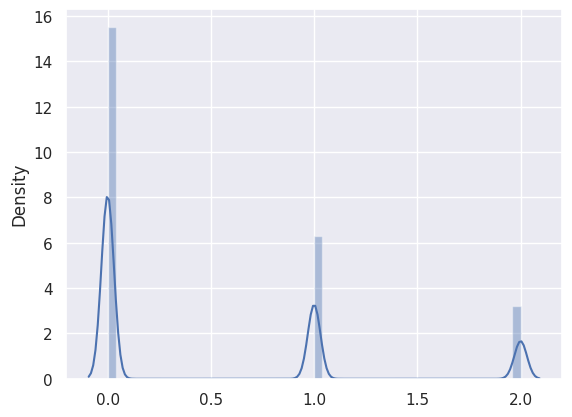

In [ ]:
df = TrainTest_new.select('LABEL')

sns.distplot(df.toPandas())

In [ ]:
TrainTest_new.select('LABEL').groupBy('LABEL').count().show()

+-----+-------+
|LABEL|  count|
+-----+-------+
|    1|1693558|
|    2| 862200|
|    0|4187645|
+-----+-------+



#### Data Stream

In [ ]:
# 0: DEP_DELAY <= 0 <=> Không bị trễ.
Stream_new = Stream.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')<=0, 0).otherwise(f.col('DEP_DELAY')))
# 1: 0 < DEP_DELAY <= 30 minutes <=> Trễ từ 1 đến 30 phút.
Stream_new = Stream_new.withColumn('DEP_DELAY', f.when((f.col('DEP_DELAY')>0) & (f.col('DEP_DELAY')<=30), 1).otherwise(f.col('DEP_DELAY')))
# 2: DEP_DELAY > 30 minutes <=> Trễ hơn 30 phút hoặc hủy chuyến.
Stream_new = Stream_new.withColumn('DEP_DELAY', f.when(f.col('DEP_DELAY')>30, 2).otherwise(f.col('DEP_DELAY')))
# Đổi tên DEP_DELAY -> LABEL
Stream_new = Stream_new.withColumnRenamed('DEP_DELAY', 'LABEL')
# Chuyển kiểu dữ liệu FLOAT -> INT
Stream_new = Stream_new.withColumn('LABEL', f.col('LABEL').cast("INT"))

In [ ]:
Stream_new.printSchema()
Stream_new.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- LABEL: integer (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|LABEL|
+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+-----+
|1/1/2024_9E_JFK_D...|      1|    1|           1|          1|               9E|   JFK| DTW|   509.0|        1252|    0|
|1/1/2024_9E_MSP_C...|      1|    1|           1|          1|      

<ipython-input-86-513688503b00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.toPandas())


<Axes: ylabel='Density'>

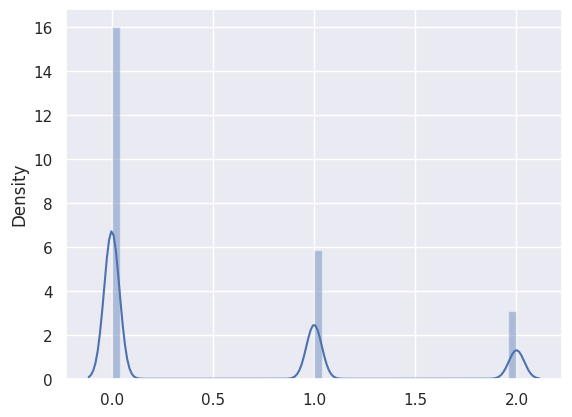

In [ ]:
df = Stream_new.select('LABEL')

sns.distplot(df.toPandas())

In [ ]:
Stream_new.select('LABEL').groupBy('LABEL').count().show()

+-----+-------+
|LABEL|  count|
+-----+-------+
|    1| 516680|
|    2| 273842|
|    0|1412445|
+-----+-------+



### Save data

In [ ]:
TrainTest_new.toPandas().to_csv(PATH+'train_final.csv',index=False)

In [ ]:
Stream_new.toPandas().to_csv(PATH+'stream_final.csv',index=False)